In [46]:
import math as mh
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tldextract
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate
%matplotlib inline
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("malicious_phish.csv")

In [3]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [11]:

##################################
# GENEL RESİM
##################################

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
   




In [12]:
check_df(df)

##################### Shape #####################
(651191, 2)
##################### Types #####################
url     object
type    object
dtype: object
##################### Head #####################
                                                 url        type
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net/index.php?optio...  defacement
##################### Tail #####################
                                                  url      type
651186        xbox360.ign.com/objects/850/850402.html  phishing
651187   games.teamxbox.com/xbox-360/1860/Dead-Space/  phishing
651188     www.gamespot.com/xbox360/action/deadspace/  phishing
651189  en.wikipedia.org/wiki/Dead_Space_(video_game)  phishing
651190      www.angelfire.com/goth/d

### Type barla görselleştirme

In [28]:
x=df["type"].value_counts()
x1=df["type"].unique()

<BarContainer object of 4 artists>

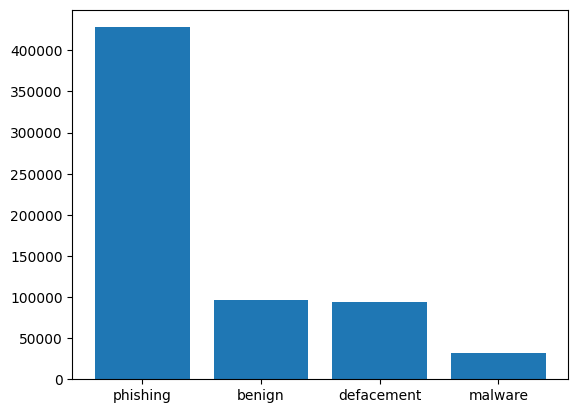

In [29]:
plt.bar(x1,x)

### Yeni değişkenler oluşturduk

In [7]:
# URL uzunluğu
df['url_length'] = df['url'].apply(lambda x: len(x)) 
# Rakamlların sayısı

df['number_count'] = df['url'].apply(lambda x: sum(c.isdigit() for c in x))
# URL içindeki özel karakter sayısı
special_characters = ['@', '#', '$', '%', '&', '*', '+', '=', '|', '\\', ':']
df['special_char_count'] = df['url'].apply(lambda x: sum(x.count(char) for char in special_characters))

# URL içindeki parametre sayısı
df['param_count'] = df['url'].apply(lambda x: x.count('&') + 1 if '?' in x else 0)

# URL içindeki harf ve sayı oranları
df['letter_ratio'] = df['url'].apply(lambda x: sum(c.isalpha() for c in x) / len(x))
df['digit_ratio'] = df['url'].apply(lambda x: sum(c.isdigit() for c in x) / len(x))

df['domain'] = df['url'].apply(lambda x: tldextract.extract(x).domain)
df['domain_length'] = df['domain'].apply(lambda x: len(x))

In [8]:
df.head()

,url,type,url_length,number_count,special_char_count,param_count,letter_ratio,digit_ratio,domain,domain_length
0,br-icloud.com.br,phishing,16,0,0,0,0.812500,0.000000,br-icloud,9
1,mp3raid.com/music/krizz_kaliko.html,benign,35,1,0,0,0.828571,0.028571,mp3raid,7
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,1,0,0,0.806452,0.032258,bopsecrets,10
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,7,8,4,0.715909,0.079545,garage-pirenne,14
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,22,6,3,0.846809,0.093617,adventure-nicaragua,19


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
url_length,651191.0,60.156831,44.753902,1.0,32.0,47.0,77.0,2175.0
number_count,651191.0,5.527249,11.700686,0.0,0.0,2.0,7.0,1204.0
special_char_count,651191.0,1.944052,5.638192,0.0,0.0,0.0,1.0,277.0
param_count,651191.0,0.592739,1.500660,0.0,0.0,0.0,0.0,51.0


### Label Encode işlemi

In [10]:
label_encoder = LabelEncoder()

df['domain'] = label_encoder.fit_transform(df['domain'])

df['type'] = label_encoder.fit_transform(df['type'])

#### Urlyi sildik

In [11]:
df.drop('url', axis=1, inplace=True)

### Isı haritası

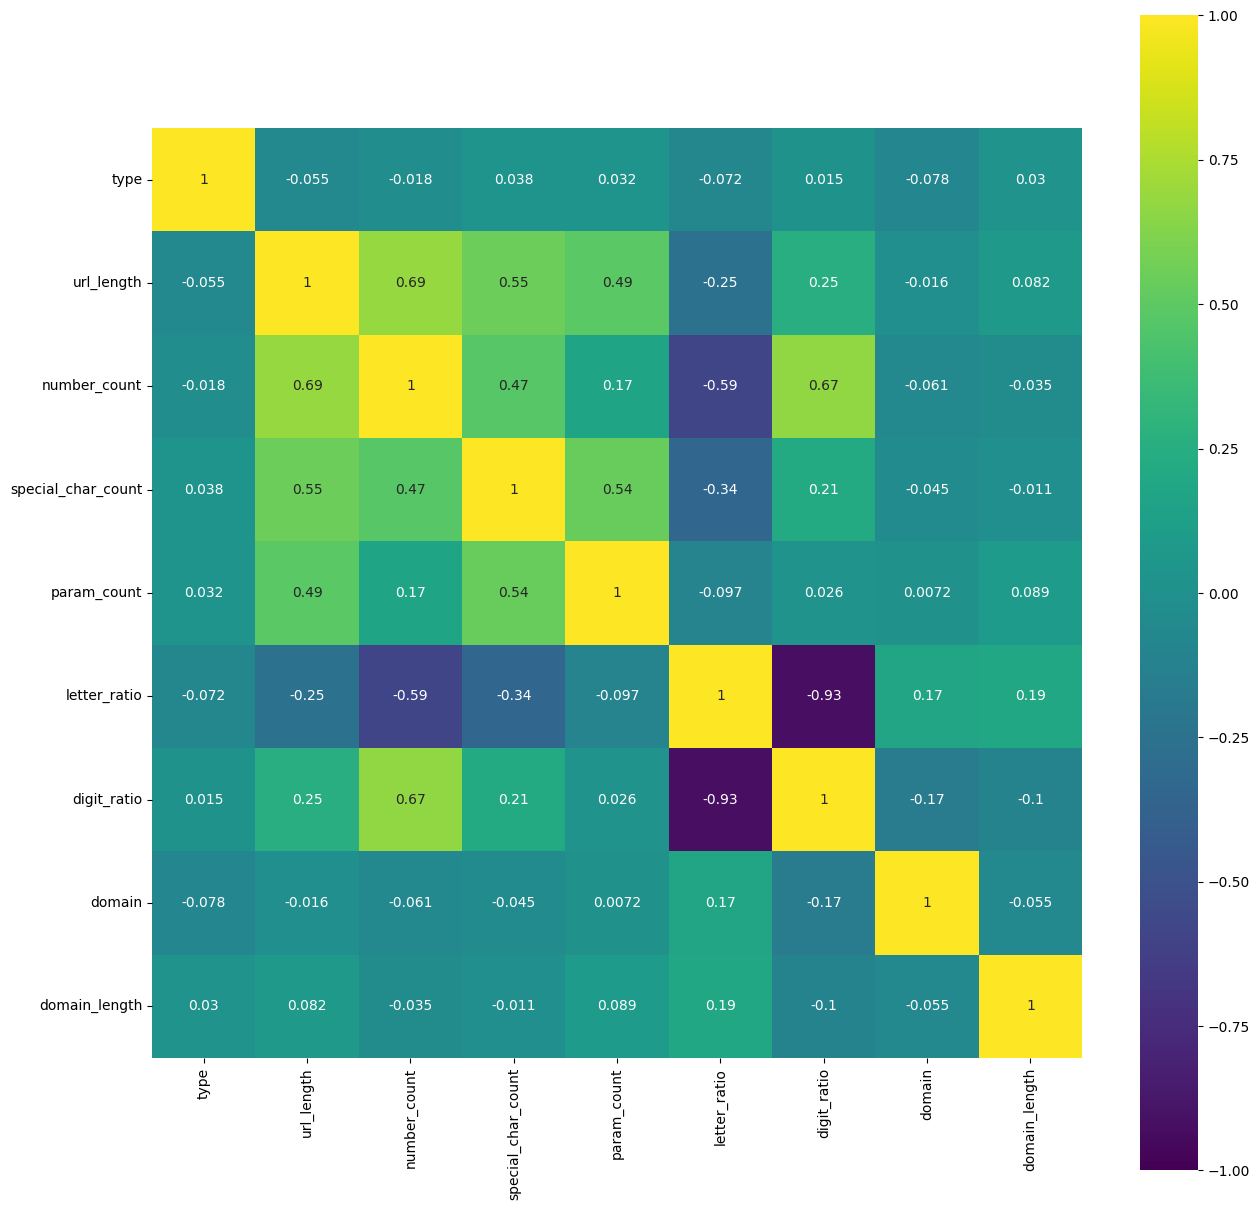

In [12]:

plt.figure(figsize = (15, 15))
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap='viridis', annot=True, square=True)

# Show the plot
plt.show()

### Özelliklerin ölçeklendirilmesi (scaling) işlemi

In [32]:
for col in df.columns:
    df[col]=RobustScaler().fit_transform(df[[col]])

### Model Oluşturma

In [33]:
X = df.drop("type", axis=1)
y = df["type"]

In [35]:
log_model=LogisticRegression().fit(X,y)

C:\Users\iremu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
log_model.coef_

array([[ 0.01931101, -0.00770292,  0.03717391, -0.18647186,  1.93447573,
         1.78792106,  0.25287063, -0.44144756],
       [ 0.63596399, -0.23864534, -0.02929163,  0.35837235, -1.94983117,
        -2.32988867,  0.07245184,  0.80027378],
       [ 0.05189128, -0.19293987, -0.01182996,  0.06547051, -1.23134978,
        -0.027478  , -0.39586679, -0.02202541],
       [-0.70716628,  0.43928813,  0.00394768, -0.23737099,  1.24670523,
         0.56944561,  0.07054433, -0.33680081]])

In [37]:
log_model.intercept_

array([ 1.68803756, -0.32972313, -1.75893912,  0.40062469])

In [38]:
y_pred=log_model.predict(X)

In [39]:
def plot_confusion_matrix(y,y_pred):
    acc=round(accuracy_score(y,y_pred),2)
    cm=confusion_matrix(y,y_pred)
    sns.heatmap(cm,annot=True,fmt=".0f")
    plt.xlabel("y_pred")
    plt.ylabel("y")
    plt.title("Accuracy Score :{0}".format(acc),size=10)
    plt.show()

In [40]:
def plot_confusion_matrix(y,y_pred):
    acc=round(accuracy_score(y,y_pred),2)
    cm=confusion_matrix(y,y_pred)
    sns.heatmap(cm,annot=True,fmt=".0f")
    plt.xlabel("y_pred")
    plt.ylabel("y")
    plt.title("Accuracy Score :{0}".format(acc),size=10)
    plt.show()

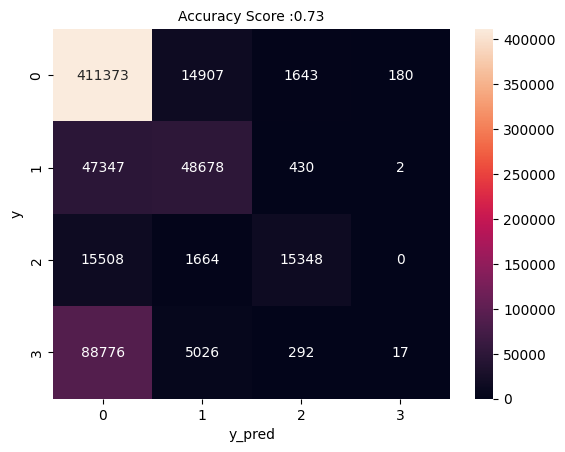

In [41]:
plot_confusion_matrix(y,y_pred)

In [44]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.96      0.83    428103
         1.0       0.69      0.50      0.58     96457
         2.0       0.87      0.47      0.61     32520
         3.0       0.09      0.00      0.00     94111

    accuracy                           0.73    651191
   macro avg       0.59      0.48      0.51    651191
weighted avg       0.64      0.73      0.66    651191



### Train-test olarak ayırarak model oluşturma

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [49]:
log_model=LogisticRegression().fit(X_train,y_train)

C:\Users\iremu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
y_pred=log_model.predict(X_test)

In [51]:
y_prob=log_model.predict_proba(X_test)[:,1]

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.96      0.83    128733
         1.0       0.69      0.51      0.58     28692
         2.0       0.87      0.47      0.61      9699
         3.0       0.11      0.00      0.00     28234

    accuracy                           0.73    195358
   macro avg       0.60      0.48      0.51    195358
weighted avg       0.64      0.73      0.66    195358



In [54]:
log_model=LogisticRegression().fit(X,y)

C:\Users\iremu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
cv_results=cross_validate(log_model,X,y,cv=5,scoring=["accuracy","precision","recall","f1","roc_auc"])

C:\Users\iremu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\iremu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\iremu\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\iremu\anaconda3\lib\site-packages\sklearn\metrics\_scorer.p

In [56]:
cv_results["test_accuracy"].mean()

0.722122990553599

In [60]:
random_user

,url_length,number_count,special_char_count,param_count,letter_ratio,digit_ratio,domain,domain_length
536448,-0.2,1.285714,1.0,0.0,-2.624838,2.400679,-0.926695,0.571429


In [61]:
log_model.predict(random_user)

array([2.])